In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# To show all columns in a dataframe
pd.options.display.max_info_columns=250
pd.options.display.max_columns=500

# To make pretty plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-ticks')
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

%matplotlib inline

# MIMIC-IV

### Explore the target variable
1. Look at the histograms of MV duration (`duration`) and time to death from intubation (`time_to_death`).
2. Explore the distribution of class variabes
3. Visualise four categories of patients
4. ...

**Load data**

In [2]:
df_meta = pd.read_csv("../data/mimic-metadata.csv")
print(df_meta.shape)
df_meta.head()

(12652, 16)


,stay_id,starttime,endtime,duration,over72h,subject_id,hadm_id,hosp_intime,hosp_outtime,icu_intime,icu_outtime,deathtime,time_to_death,alive96h,log_duration,study_id
0,30000670,2182-04-14 07:45:00,2182-04-15 10:00:00,26.250000,0,13134463,28333727,2182-04-10 22:25:00,2182-04-19 15:56:00,2182-04-10 22:42:19,2182-04-19 00:37:36,NaN,NaN,1,3.267666,NaN
1,30000974,2119-06-21 19:30:00,2119-07-07 13:10:00,377.666667,1,19407684,29905273,2119-06-21 19:09:00,2119-07-08 18:45:00,2119-06-21 23:57:00,2119-07-08 19:32:46,NaN,NaN,1,5.934012,NaN
2,30001939,2151-04-06 16:55:00,2151-04-15 15:40:00,214.750000,1,19023641,25083387,2151-03-18 12:42:00,2151-04-15 18:10:00,2151-04-06 13:22:49,2151-04-15 19:25:07,2151-04-15 18:10:00,217.25,1,5.369475,NaN
3,30002055,2171-09-26 14:28:00,2171-09-29 08:55:00,66.450000,0,10887901,28942534,2171-09-26 12:10:00,2171-10-29 14:45:00,2171-09-26 13:42:00,2171-10-09 09:50:58,NaN,NaN,1,4.196450,NaN
4,30003299,2169-08-22 01:51:00,2169-08-28 12:02:00,154.183333,1,12093201,23308326,2169-08-22 00:46:00,2169-09-13 15:15:00,2169-08-22 00:48:13,2169-08-29 13:54:47,NaN,NaN,1,5.038142,NaN


**Convert timestamps to `datetime`**

In [3]:
date_cols = ["starttime", "endtime", "hosp_intime", "hosp_outtime", "icu_intime", "icu_outtime", "deathtime"]
df_meta[date_cols] = df_meta[date_cols].apply(pd.to_datetime)

**We included multiple ICU stays within one hospital admission**

In [ ]:
df_meta.hadm_id.nunique()

In [ ]:
df_meta.hadm_id.value_counts()

**Duration of mechanical ventilation**

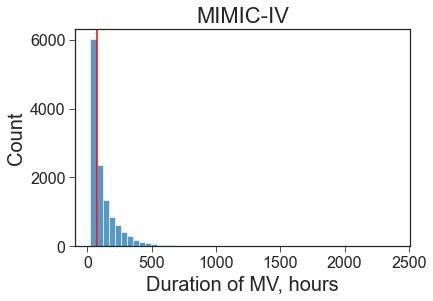

In [4]:
sns.histplot(x=df_meta.duration, bins=50);
plt.axvline(72, color="r");
plt.xlabel("Duration of MV, hours");
plt.title("MIMIC-IV");

# Uncomment to save the figure in high resolution
plt.savefig('../results/length of MV MIMIC.png', bbox_inches='tight', dpi=300)

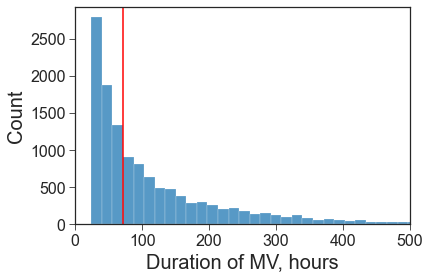

In [5]:
sns.histplot(x=df_meta.duration, bins=150);
plt.axvline(72, color="r");
plt.xlabel("Duration of MV, hours");
plt.xlim([0,500]);

# Uncomment to save the figure in high resolution
plt.savefig('../results/length of MV MIMIC 2.png', bbox_inches='tight', dpi=300)

**Time to death from the start of mechanical ventilation (if applicable)**

In [ ]:
sns.histplot(x=df_meta.time_to_death, bins=1000);
plt.axvline(96, color="r");
plt.xlim([0,720])
plt.xlabel("Hours");
plt.title("Time to death");

# Uncomment to save the figure in high resolution
plt.savefig('../results/time to death MIMIC.png', bbox_inches='tight', dpi=300)

**Distribution of class variables `over72h` and `alive96h`: full cohort**

In [ ]:
df_meta.over72h.value_counts(), df_meta.over72h.value_counts() / df_meta.shape[0]

In [ ]:
df_meta.alive96h.value_counts()

**Distribution of class variables `over72h` and `alive96h`: patients with available CXR data**

In [ ]:
df_meta[df_meta.study_id.notna()].shape

In [ ]:
df_meta[df_meta.study_id.notna()].over72h.value_counts()

In [ ]:
df_meta[df_meta.study_id.notna()].alive96h.value_counts()

In [ ]:
counts = pd.crosstab(df_meta.over72h, df_meta.alive96h)

In [ ]:
labels = np.array([[ "A: ", "B: "], ["C: ", "D: "]]) + counts.astype("str").values

In [ ]:
sns.heatmap(counts, 
            annot=labels, fmt="s", 
            cmap="Blues", cbar=False,
            annot_kws={'fontsize' : 16},
            xticklabels=("No", "Yes"), yticklabels=("No", "Yes"));
plt.xlabel("Alive at 96 hours");
plt.ylabel("MV over 72 hours");

# Uncomment to save the figure in high resolution
# plt.savefig('class distribution full.jpeg', bbox_inches='tight', dpi=300)

### Patient characteristics table

In [21]:
df = pd.read_csv("../data/mimic-ft98.csv")
print(df.shape)
df.head()

(12652, 105)


,stay_id,starttime,endtime,admission_location,insurance,language,ethnicity,marital_status,gender,age,hours_in_hosp_before_intubation,weight,height,co2_total_max,co2_total_avg,co2_total_min,ph_max,ph_avg,ph_min,lactate_max,lactate_avg,lactate_min,pao2fio2ratio,heart_rate_max,heart_rate_avg,heart_rate_min,mbp_max,mbp_avg,mbp_min,mbp_ni_max,mbp_ni_avg,mbp_ni_min,resp_rate_max,resp_rate_avg,resp_rate_min,temp_max,temp_avg,temp_min,spo2_max,spo2_avg,spo2_min,glucose_max,glucose_avg,glucose_min,vasopressin,epinephrine,dobutamine,norepinephrine,phenylephrine,dopamine,count_of_vaso,fio2_max,fio2_avg,fio2_min,peep_max,peep_avg,peep_min,plateau_pressure_max,plateau_pressure_avg,plateau_pressure_min,rrt,sinus_rhythm,neuroblocker,congestive_heart_failure,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,SOFA,respiration,coagulation,liver,cardiovascular,cns,renal,apsiii,hr_score,mbp_score,temp_score,resp_rate_score,pao2_aado2_score,hematocrit_score,wbc_score,creatinine_score,uo_score,bun_score,sodium_score,albumin_score,bilirubin_score,glucose_score,acidbase_score,gcs_score,duration,log_duration,over72h,alive96h
0,30000670,2182-04-14 07:45:00,2182-04-15 10:00:00,EMERGENCY ROOM,Medicare,ENGLISH,BLACK/AFRICAN AMERICAN,DIVORCED,M,69,81,51.7,173.0,38.0,37.000000,36.0,7.39,7.390000,7.39,2.2,2.200000,2.2,305.0,83.0,67.520000,56.0,95.0,79.880000,68.0,95.0,79.88,68.0,20.5,15.442308,13.0,36.61,35.787500,35.00,100.0,99.923077,98.0,179.0,165.500000,149.0,0,0,0,0,0,0,0,50.0,41.111111,40.0,6.4,4.640000,0.0,18.0,14.200000,11.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,2.0,0.0,NaN,0.0,1,1.0,47,1.0,7.0,2.0,8.0,0.0,3.0,0.0,0.0,7.0,7.0,0.0,NaN,NaN,0.0,12.0,0.0,26.250000,3.267666,0,1
1,30000974,2119-06-21 19:30:00,2119-07-07 13:10:00,EMERGENCY ROOM,Medicare,ENGLISH,WHITE,SINGLE,F,92,0,55.0,157.0,25.0,25.000000,25.0,7.44,7.440000,7.44,2.4,2.400000,2.4,252.0,91.0,82.500000,69.0,78.0,66.478261,52.0,53.0,52.50,52.0,34.0,29.108696,20.0,38.22,37.406667,37.00,100.0,98.318182,97.0,159.0,130.500000,102.0,0,0,0,1,0,0,1,50.0,50.000000,50.0,5.0,5.000000,5.0,17.0,15.500000,14.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0.0,0.0,0.0,3.0,3,0.0,76,0.0,15.0,0.0,6.0,0.0,3.0,5.0,0.0,5.0,11.0,0.0,6.0,0.0,0.0,12.0,13.0,377.666667,5.934012,1,1
2,30001939,2151-04-06 16:55:00,2151-04-15 15:40:00,EMERGENCY ROOM,Medicaid,ENGLISH,WHITE,SINGLE,M,47,460,42.0,175.0,20.0,19.142857,18.0,7.28,7.224286,7.18,1.3,1.250000,1.2,92.5,108.0,87.821429,62.0,98.0,76.431034,58.0,98.0,78.15,57.0,34.0,21.550000,14.0,36.67,36.325000,35.89,100.0,96.964286,92.0,158.0,112.400000,91.0,0,0,0,1,0,0,1,100.0,88.333333,80.0,7.0,4.454545,0.0,31.0,31.000000,31.0,0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,13,4.0,1.0,0.0,4.0,4,0.0,132,1.0,15.0,2.0,9.0,14.0,3.0,5.0,3.0,5.0,2.0,2.0,11.0,0.0,0.0,12.0,48.0,214.750000,5.369475,1,1
3,30002055,2171-09-26 14:28:00,2171-09-29 08:55:00,WALK-IN/SELF REFERRAL,Medicare,ENGLISH,BLACK/AFRICAN AMERICAN,MARRIED,M,69,2,58.8,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.0,116.500000,90.0,150.0,83.250000,44.0,65.0,53.25,44.0,26.0,19.580000,10.0,35.00,33.950000,33.20,100.0,99.190476,84.0,271.0,229.111111,167.0,0,1,0,1,0,0,2,30.0,30.000000,30.0,19.0,11.933333,8.0,30.0,23.833333,18.0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN,4.0,1,0.0,62,7.0,10.0,20.0,0.0,15.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,2.0,0.0,66.450000,4.196450,0,1
4,30003299,2169-08-22 01:51:00,2169-08-28 12:02:00,EMERGENCY ROOM,Other,ENGLISH,WHITE,SINGLE,M,26,1,120.0,178.0,29.0,24.888889,21.0,7.40,7.335556,7.27,4.0,2.777778,1.5,280.0,133.0,119.500000,101.0,122.0,93.071429,70.0,NaN,NaN,NaN,18.0,17.105263,12.0,37.44,36.971667,36.39,100.0,98.555556,96.0,185.0,152.166667,130.0,0,0,0,0,0,0,0,50.0,48.333333,40.0,5.0,5.000000,5.0,25.0,23.600000,22.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,NaN,0.0,3,0.0,48,7.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,0.0,

In [ ]:
df.corrwith(df.log_duration).abs().sort_values(ascending=False).head(10)

**Numeric variables: a single variable**

Group by the outcome variable, calculate mean and std, round to 1 decimal

In [ ]:
df.groupby("over72h").age.agg([np.mean, np.std]).round(1)

**All numeric variables**

In [ ]:
num_vars = df.select_dtypes('number').columns[1: -2]

In [ ]:
df.groupby("over72h")[num_vars].agg([np.mean, np.std]).round(1)

**Categorical variables: a single dichotomous variable**

The number of females `"F"` in the cohort: sum, calculate the percentage, round to 1 decimal

In [ ]:
df.groupby("over72h").apply(lambda x: (x.gender == "F").sum() * 100 / x.shape[0]).round(1)

**Categorical variables: a single variable with multiple values**

Print the most common value, then calculate its percentage in both groups

In [ ]:
print("Most common value:", df.groupby("over72h").admission_location.describe().top)

df.groupby("over72h").admission_location.describe().apply(lambda x: x.freq / x['count'] * 100, axis=1).round(1)

**All categorica variables**

In [ ]:
cat_vars = df.select_dtypes('object').columns[2:]

### Other characteristics

**Length of MV, ICU and hospital stays**

In [ ]:
df_meta["icu_duration"] = (df_meta.icu_outtime - df_meta.icu_intime).dt.days
df_meta["hosp_duration"] = (df_meta.hosp_outtime - df_meta.hosp_intime).dt.days

In [ ]:
df_meta.groupby("over72h")[["duration", "icu_duration", "hosp_duration"]].agg([np.mean, np.std]).round(1)

**Percentage of people that died during their ICU stay**

In [ ]:
df_meta["expired_in_icu"] = (df_meta.deathtime < df_meta.icu_outtime).astype(int)
df_meta.groupby("over72h").apply(lambda x: x.expired_in_icu.sum() * 100 / x.shape[0]).round(1)

**Time to death**

In [ ]:
df_meta.groupby("over72h").time_to_death.agg([np.mean, np.std]).round(1)

In [1]:
import pandas as pd

In [19]:
df = pd.read_csv("../data/mimic-ft98.csv")

In [10]:
df.corrwith(df.log_duration).abs().sort_values(ascending=False).head(17)

log_duration            1.000000
duration                0.845894
over72h                 0.822789
cns                     0.373248
gcs_score               0.369510
apsiii                  0.355160
acidbase_score          0.296702
peep_avg                0.252978
peep_min                0.244585
peep_max                0.227299
SOFA                    0.219285
plateau_pressure_avg    0.214201
resp_rate_avg           0.206005
alive96h                0.203994
plateau_pressure_min    0.173816
plateau_pressure_max    0.167817
fio2_avg                0.165991
dtype: float64

In [20]:
df.corrwith(df.log_duration).round(2).sort_values(ascending=False).head(17)

log_duration            1.00
duration                0.85
over72h                 0.82
gcs_score               0.37
cns                     0.37
apsiii                  0.36
acidbase_score          0.30
peep_avg                0.25
peep_min                0.24
peep_max                0.23
SOFA                    0.22
resp_rate_avg           0.21
plateau_pressure_avg    0.21
alive96h                0.20
plateau_pressure_min    0.17
fio2_avg                0.17
plateau_pressure_max    0.17
dtype: float64

In [12]:
df.corrwith(df.log_duration)[df.corrwith(df.log_duration).abs().sort_values(ascending=False).head(17).index]

log_duration            1.000000
duration                0.845894
over72h                 0.822789
cns                     0.373248
gcs_score               0.369510
apsiii                  0.355160
acidbase_score          0.296702
peep_avg                0.252978
peep_min                0.244585
peep_max                0.227299
SOFA                    0.219285
plateau_pressure_avg    0.214201
resp_rate_avg           0.206005
alive96h                0.203994
plateau_pressure_min    0.173816
plateau_pressure_max    0.167817
fio2_avg                0.165991
dtype: float64

___
# eICU

### Explore the target variable

In [21]:
df = pd.read_csv("../data/eicu-ft58.csv")
print(df.shape)
df.head()

(21185, 64)


,stay_id,starttime,endtime,duration,over72h,ph_max,spo2_min,heart_rate_min,heart_rate_max,resp_rate_min,...,teachingstatus,lactate_max,lactate_min,lactate_avg,resp_rate_avg,plateau_pressure_avg,plateau_pressure_min,age,hours_in_hosp_before_intubation,log_duration
0,2127890,1853,4506,44.217,0,NaN,89.0,107.0,196.0,16.0,...,False,9.1,4.5,6.875,24.600,20.200,19.0,55,38,3.789109
1,2519150,95,4175,68.000,0,NaN,88.0,96.0,116.0,13.0,...,False,1.3,1.3,1.300,18.600,20.500,12.0,29,4,4.219508
2,919705,3012,5367,39.250,0,7.51,85.0,58.0,73.0,15.0,...,False,NaN,NaN,NaN,16.359,26.857,16.0,61,51,3.669951
3,1554681,44,1724,28.000,0,7.40,91.0,87.0,113.0,0.0,...,False,NaN,NaN,NaN,16.136,18.000,18.0,66,36,3.332205
4,260998,89,1937,30.800,0,7.25,75.0,109.0,121.0,28.0,...,False,7.1,5.5,6.133,31.333,NaN,NaN,64,1,3.427515


In [4]:
df.columns[5:-1]

Index(['ph_max', 'spo2_min', 'heart_rate_min', 'heart_rate_max',
       'resp_rate_min', 'resp_rate_max', 'temp_min', 'temp_max', 'glucose_max',
       'glucose_min', 'co2_total_max', 'co2_total_min', 'mbp_max',
       'mbp_ni_min', 'apsiii', 'peep_max', 'peep_min', 'co2_total_avg',
       'fio2_min', 'plateau_pressure_max', 'height', 'peep_avg', 'temp_avg',
       'hr_score', 'mbp_score', 'temp_score', 'resp_rate_score',
       'pao2_aado2_score', 'hematocrit_score', 'wbc_score', 'creatinine_score',
       'uo_score', 'bun_score', 'sodium_score', 'albumin_score',
       'bilirubin_score', 'glucose_score', 'acidbase_score', 'gcs_score',
       'SOFA', 'respiration', 'coagulation', 'liver', 'cardiovascular', 'cns',
       'renal', 'hospitalid', 'numbedscategory', 'region', 'teachingstatus',
       'lactate_max', 'lactate_min', 'lactate_avg', 'resp_rate_avg',
       'plateau_pressure_avg', 'plateau_pressure_min', 'age',
       'hours_in_hosp_before_intubation'],
      dtype='object')

**Duration of mechanical ventilation**

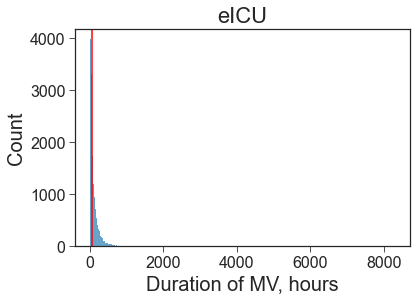

In [5]:
sns.histplot(x=df.duration, bins=500);
plt.axvline(72, color="r");
plt.xlabel("Duration of MV, hours");
plt.title("eICU");

# Uncomment to save the figure in high resolution
plt.savefig('../results/length of MV eICU.png', bbox_inches='tight', dpi=300)

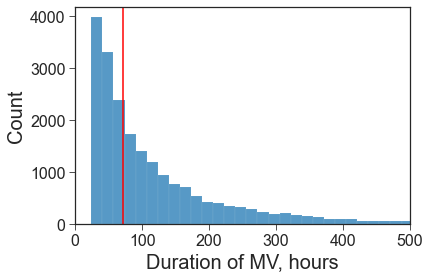

In [6]:
sns.histplot(x=df.duration, bins=500);
plt.axvline(72, color="r");
plt.xlabel("Duration of MV, hours");
plt.xlim([0,500]);

# Uncomment to save the figure in high resolution
plt.savefig('../results/length of MV eICU 2.png', bbox_inches='tight', dpi=300)

**Distribution of class variable `over72h`**

In [7]:
df.over72h.value_counts(), df.over72h.value_counts() / df.shape[0]

(1    11726
 0     9459
 Name: over72h, dtype: int64,
 1    0.553505
 0    0.446495
 Name: over72h, dtype: float64)

### Correlation with MV

In [22]:
df.corrwith(df.log_duration).round(2).sort_values(ascending=False).head(18)

log_duration            1.00
duration                0.81
over72h                 0.80
endtime                 0.79
peep_avg                0.18
peep_max                0.15
peep_min                0.15
fio2_min                0.15
apsiii                  0.11
hr_score                0.09
bun_score               0.09
plateau_pressure_min    0.09
resp_rate_avg           0.09
heart_rate_max          0.09
heart_rate_min          0.09
starttime               0.09
SOFA                    0.08
temp_max                0.08
dtype: float64

**Three largest hospitals**

df.hospitalid.nunique()

In [ ]:
df.hospitalid.value_counts()

In [ ]:
hospid = df.hospitalid.value_counts().head(3).index

In [ ]:
df[df.hospitalid==hospid[0]].corrwith(df.log_duration).abs().sort_values(ascending=False).head(7)

In [ ]:
df[df.hospitalid==hospid[1]].corrwith(df.log_duration).abs().sort_values(ascending=False).head(7)

In [ ]:
df[df.hospitalid==hospid[2]].corrwith(df.log_duration).abs().sort_values(ascending=False).head(7)

**Different sizes**

In [ ]:
df[df.numbedscategory=="S"].corrwith(df.log_duration).abs().sort_values(ascending=False).head(7)

In [ ]:
df[df.numbedscategory=="M"].corrwith(df.log_duration).abs().sort_values(ascending=False).head(7)

In [ ]:
df[df.numbedscategory=="L"].corrwith(df.log_duration).abs().sort_values(ascending=False).head(7)

In [ ]:
df[df.numbedscategory=="XL"].corrwith(df.log_duration).abs().sort_values(ascending=False).head(7)

# MIMIC and selected features

In [ ]:
features = ["acidbase_score",
            "cns",
            "co2_total_avg",
            "gcs_score",
            "height",
            "malignant_cancer",
            "paraplegia",
            "peep_avg",
            "peep_min",
            "resp_rate_min",
            "temp_avg",
            "uo_score"]

In [ ]:
df = pd.read_csv("../data/mimic-ft98.csv")
print(df.shape)
df.head()

In [ ]:
for f in features:
    plt.figure();
    sns.scatterplot(x=f, y="log_duration", data=df);

In [ ]:
sns.lmplot(x="height", y="duration", data=df);
plt.xlabel("Height, cm");
plt.ylabel("Duration of MV, hours");

plt.savefig('../results/height vs MV MIMIC.jpg', bbox_inches='tight', dpi=300)

In [27]:
from scipy.stats import kstest

kstest(x1, x2, alternative='two-sided')

KstestResult(statistic=0.050442972202413255, pvalue=5.8971352267460485e-18)